In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for plotting
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms


In [2]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target # Training labels ('malignant = 0', 'benign = 1')
X = cancer_data.data # 30 attributes; https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
X = preprocessing.scale(X) # scale each data attribute to zero-mean and unit variance 

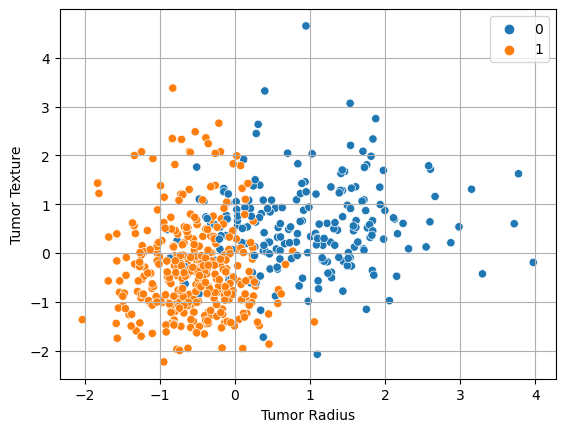

In [3]:
# Plot the first 2 attributes of training points
sns.scatterplot(x=X[:, 0],y=X[:,1], hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [5]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Add target to the DataFrame
df['target'] = cancer_data.target

# Display the first 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
alpha = np.arange(1e-15,1,0.005) # Range of hyperparameter values 1E-15 to 1 by 0.005
val_scores = np.zeros((len(alpha),1)) # Initialize validation score for each alpha value

for i in range(len(alpha)): # for each alpha value
    # Set up SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean() # Calculate mean of the 5 scores

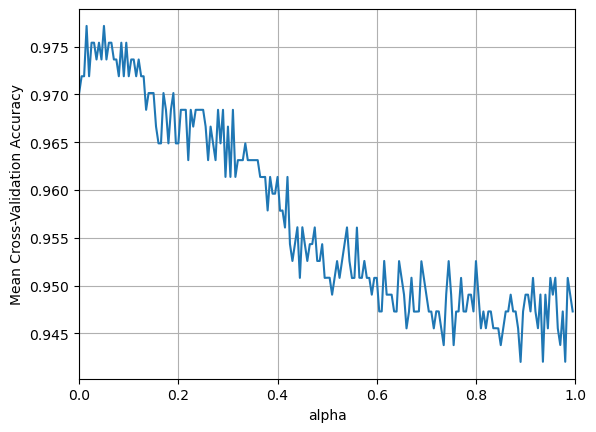

In [7]:
# Plot how cross-validation score changes with alpha
plt.plot(alpha,val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

alpha_star = 0.015000000000000999


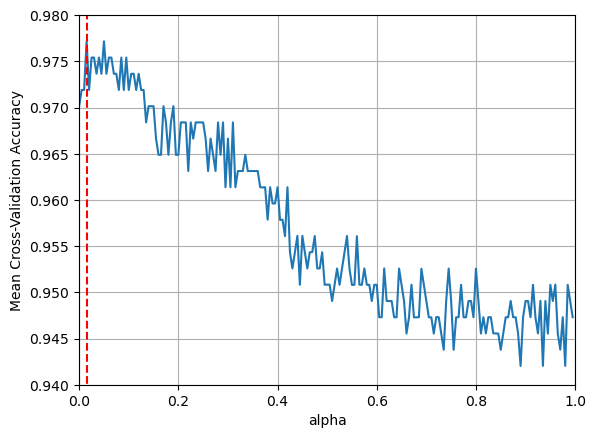

In [8]:
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1),'--r')
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

In [9]:
# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X,y)
print('Training Accuracy =', model_trained.score(X,y))



Training Accuracy = 0.9859402460456942


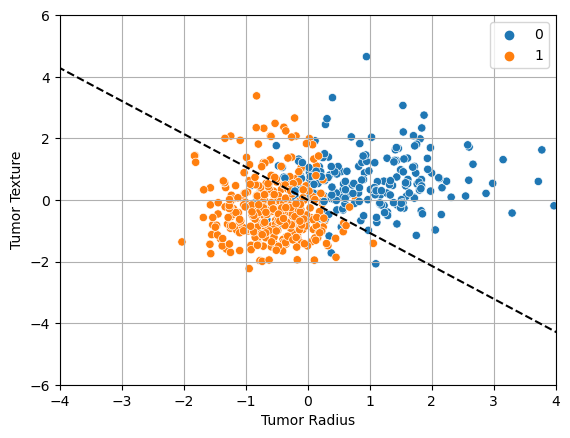

In [10]:
# Plot decision boundary of trained model
slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(-10,10,0.5)
y1 = slope*x1
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.plot(x1,y1,'--k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()